#### Regresión lineal simple

X = Independientes y una variable Y = dependiente

#### Ejemplo el precio de una casa
- Sector de la casa
- Cercanía centro comerciales
- Número de habitaciones
- Metros cuadrados

Y = El precio de la casa

Por medio de la correlación nosotros identificar que variables son mejores para estimar el precio de la casa

El precio de la casa.



In [1]:
# Predecir el precio de las casas, variable objetico 'SalePrice'

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use("seaborn-dark")

In [4]:
# Importar los datos train
train = pd.read_csv('train.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.shape # 1460 filas y 81 columnas

(1460, 81)

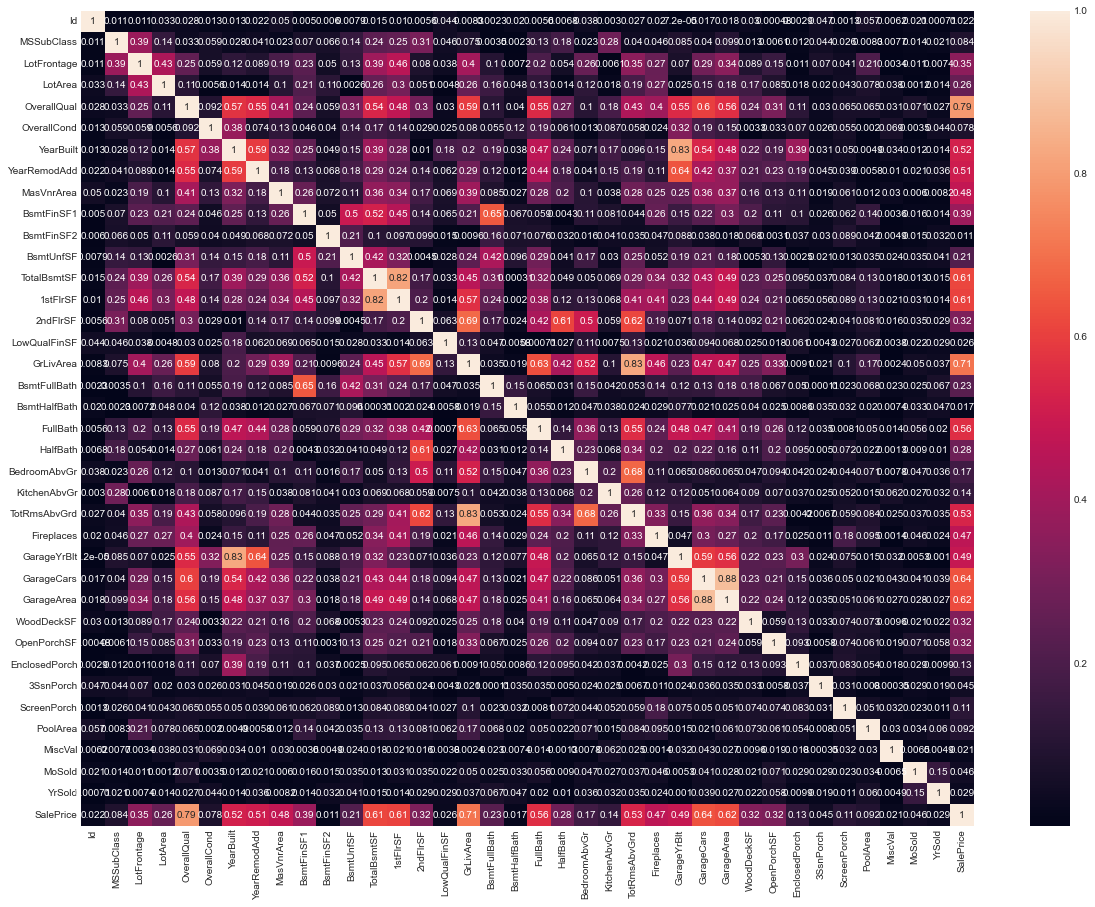

In [17]:
# Deseamos ver la correlación entre las variables, para estimar que variables vamos a utilizar 
# para nuestro modelo
plt.figure(figsize=(20, 15 ))
sns.heatmap(train.corr().abs(), annot = True)
plt.show()

In [19]:
# Tomar las correlaciones con la variable objetivo SalePrice
corr = train.corr().abs()

In [20]:
corr_SP =corr.loc[:,['SalePrice']]

In [21]:
corr_SP

,SalePrice
Id,0.021917
MSSubClass,0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


In [24]:
corr_SP.sort_values(ascending=False, by='SalePrice')
# Hay algunas que tienen correlación altas

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


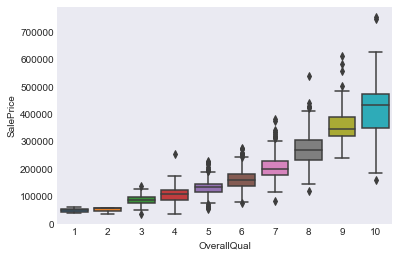

In [27]:
sns.boxplot(x='OverallQual', y = 'SalePrice', data = train)
plt.show()
# OverallQual = Material general y calidad de acabado. tiene la correlación fuerte con SalePrice

In [29]:
#Variable Seleccionadas]
train_select = train.loc[:,['SalePrice','OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 
                            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd','YearBuilt','YearRemodAdd']]

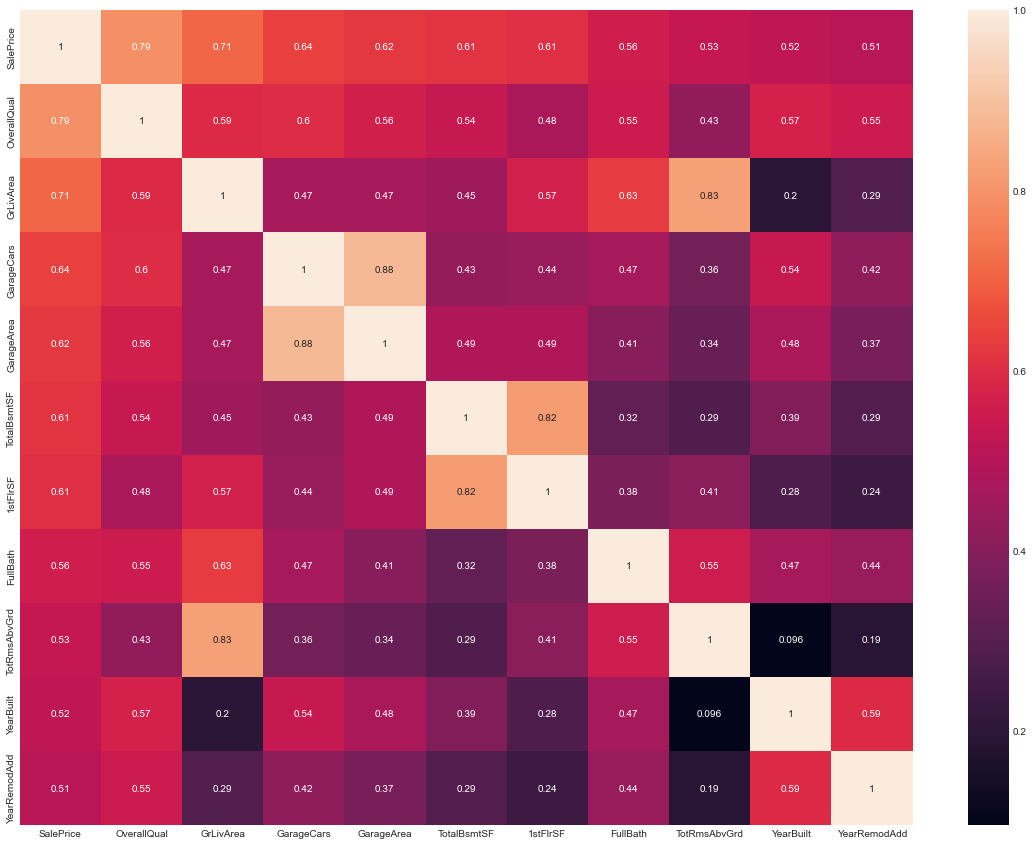

In [31]:
# volvemos a graficar la matriz
plt.figure(figsize=(20, 15 ))
sns.heatmap(train_select.corr().abs(), annot = True)
plt.show()

In [32]:
# No queremos correlaciones altas entre las variables independientes (que superen a la variable objetivo)
# Observamos GrLivArea y TotRmsAbvGrd tiene una correlacion 0.83 entonces
# vamos a escojer la que tenga una mayor correlación con el SalePrice

# GrLiveArea: pies cuadrados sobre el nivel del suelo (superficie)
# TotRmsAbvGrd: Total de habitaciones por encima del grado (no incluye baños)


In [33]:
train_select

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


In [39]:
# Las variables que hemos decidido utilizar
train_seleccionados = train_select.loc[:,['SalePrice','OverallQual','GrLivArea', 'GarageCars', 
                            'TotalBsmtSF','YearBuilt','YearRemodAdd']]

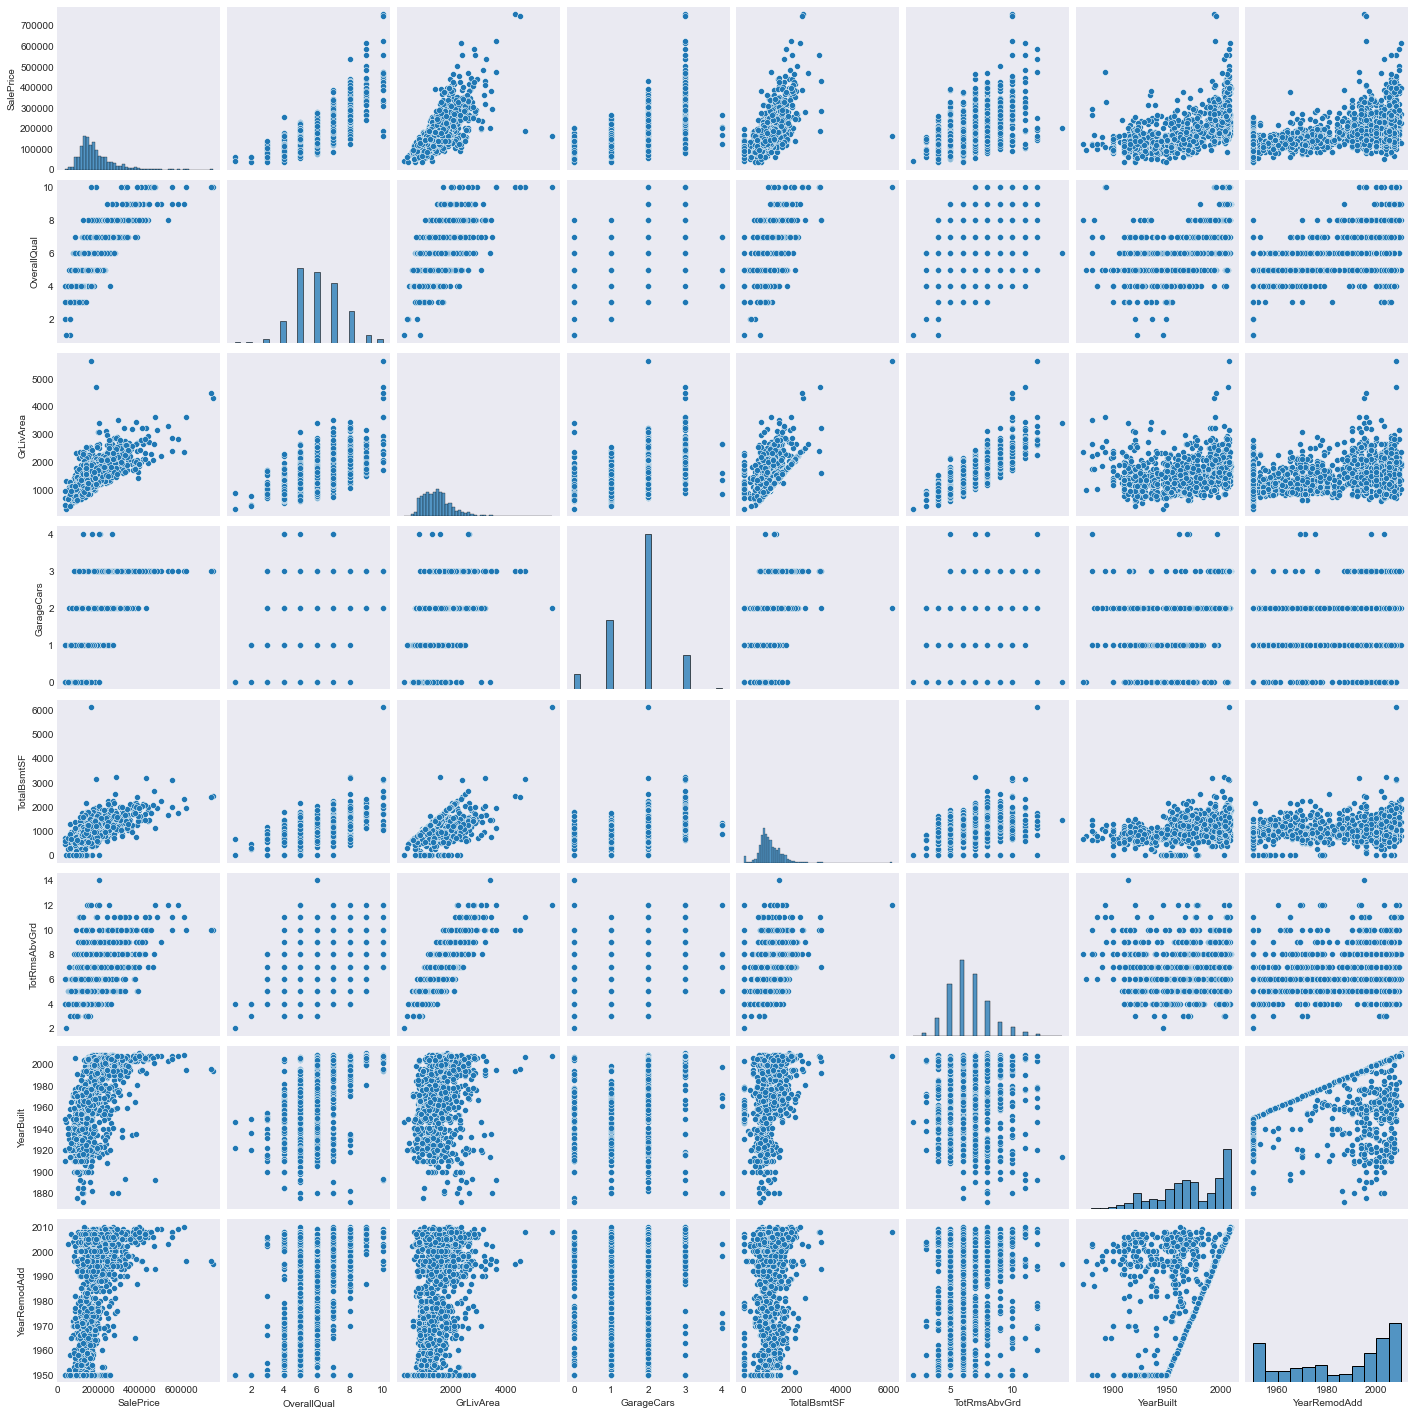

In [38]:
sns.pairplot(train_seleccionados)
plt.show()

In [43]:
X = train.loc[:,['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF','YearBuilt','YearRemodAdd']]
y = train.loc[:,['SalePrice']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
print(lm.intercept_)

[-1099624.78138855]


In [50]:
lm.coef_

array([[19436.90877887,    43.67490507, 16735.52372284,    23.40676256,
          219.67814787,   306.03756758]])

In [51]:
y_pred = lm.predict(X_test)

In [54]:
DTpredicciones = pd.DataFrame(y_pred)
DTpredicciones.reset_index(drop =True, inplace=True)
y_test.reset_index(drop =True, inplace=True)
dt_unido = y_test.join(DTpredicciones)

In [55]:
dt_unido

,SalePrice,0
0,154500,149386.207296
1,325000,286684.405177
2,115000,119615.676742
3,159000,171129.761054
4,315500,289603.748817
...,...,...
477,135000,111365.248440
478,119000,108313.841750
479,215000,225432.551723
480,133500,108965.237919


In [56]:
from sklearn import metrics

In [59]:
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 1537855915.4515355
MAE 24582.305134592818
RMSE 39215.50605884789


In [60]:
#datos test
test = pd.read_csv("test.csv")

In [61]:
X = test.loc[:,['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF','YearBuilt','YearRemodAdd']]

In [70]:

X.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [66]:
X['GarageCars'].fillna(0, inplace = True)

In [68]:
X['TotalBsmtSF'].mean()

1046.1179698216736

In [69]:
X['TotalBsmtSF'].fillna(X['TotalBsmtSF'].mean(), inplace = True)

In [71]:
y_pred =lm.predict(X)

In [81]:
DTpredicciones = pd.DataFrame(y_pred)
DTpredicciones.reset_index(drop =True, inplace=True)
id = test.loc[:,['Id']]
id.reset_index(drop =True, inplace=True)
dt_competicion = id.join(DTpredicciones)

In [82]:
dt_competicion.columns = ['Id', 'SalePrice']

In [83]:
dt_competicion.head()

,Id,SalePrice
0,1461,105001.283738
1,1462,152235.102130
2,1463,174059.027281
3,1464,192576.928055
4,1465,222431.776022


In [85]:
dt_competicion.to_csv('concurso.csv', index = False)